
# Using SVM to Predict Stocks' Price Performance 
![SVM](SVM.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-SVM-to-Predict-Stocks'-Price-Performance" data-toc-modified-id="Using-SVM-to-Predict-Stocks'-Price-Performance-1">Using SVM to Predict Stocks' Price Performance</a></span><ul class="toc-item"><li><span><a href="#Project-Definition" data-toc-modified-id="Project-Definition-1.1">Project Definition</a></span><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1.1.1">Project Overview</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1.2">Problem Statement</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1.1.3">Metrics</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-1.2">Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2.1">Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.2.2">Data Visualization</a></span></li></ul></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.3">Methodology</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.3.1">Data Preprocessing</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.3.2">Implementation</a></span></li><li><span><a href="#Refinement" data-toc-modified-id="Refinement-1.3.3">Refinement</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-1.4">Results</a></span><ul class="toc-item"><li><span><a href="#Model-Evaluation-&amp;-Validation" data-toc-modified-id="Model-Evaluation-&amp;-Validation-1.4.1">Model Evaluation &amp; Validation</a></span></li><li><span><a href="#Justification" data-toc-modified-id="Justification-1.4.2">Justification</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5">Conclusion</a></span><ul class="toc-item"><li><span><a href="#Reflection" data-toc-modified-id="Reflection-1.5.1">Reflection</a></span></li><li><span><a href="#Improvement" data-toc-modified-id="Improvement-1.5.2">Improvement</a></span></li><li><span><a href="#Write-Up" data-toc-modified-id="Write-Up-1.5.3">Write-Up</a></span></li></ul></li></ul></li></ul></div>

## Project Definition
### Project Overview
-  High-level overview of the project

This data science project focuses on building an AI/ML model to predict the 52-week price performance of a stock based on financial data extrapolated from the S&P 500 list of companies. The data are explored, visualized and processed. Then the SVR is implemented and refined. Finally, the results are covered alongside the conclusion.
-  Background information 

Problem domain, origin, and data sets: It is challenging to predict a stock's 52-week price performance with accuracy. The financial experts use certain criteria to predict performance, but that skill is tacit and difficult to learn. This project will aim to teach a machine how to make a prediction with 70%+ accuracy. The data set is gathered from Fidelity.com. If you have an account with Fidelity you can extract the data from their screener option by using their "download to excel" option.

### Problem Statement
-  Machines do not know how to predict a stock's 52-week price performance with accuracy. This project showcases a strategy for solving the problem by using support vector machine (SVM). After the model is trained and tested, it will be able to provide a solution that can predict a stock's 52-week price performance with 73% accuracy.

### Metrics
-  We used the regression form of SVM known as SVR (support vector regression). The metric used to measure performance of the SVR model is the R2 score. The higher the score is to 1, the more accurate the model is. A score that is near is above .7 is considered an acceptable rate to deem the model reliable. We picked the metric because we need high accuracy to predict the stock market and cannot afford a 50/50% chance for such an important topic that involves financial ramifications.  

## Data Analysis

In [51]:
# import libraries

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import deque
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Data Exploration 

In [52]:
#Data Exploration 
df = pd.read_excel('screener_results.xls')
df

,Symbol,Company Name,Security Price,Volume (90 Day Avg),Market Capitalization,Dividend Yield,Company Headquarters Location,Sector,Industry,Price Performance (52 Weeks),...,Standard Deviation (1 Yr Annualized),S&P Global Market Intelligence Valuation,S&P Global Market Intelligence Quality,S&P Global Market Intelligence Growth Stability,S&P Global Market Intelligence Financial Health,P/E (Price/TTM Earnings),PEG Ratio,EPS Growth (Proj This Yr vs. Last Yr),Institutional Ownership,Institutional Ownership (Last vs. Prior Qtr)
0,A,Agilent Technologies Inc,66.46,2.14098,$20.39B,1.09489,United States of America,Health Care,Life Sciences Tools & Services,-19.01478,...,0.25951,84.0,68.0,0.0,86.0,27.5,3.06181,9.09968,85.0947,0.5108
1,ARNC,Arconic Inc,13.25,4.02010,$6.86B,0.50473,United States of America,Industrials,Aerospace & Defense,-17.10251,...,0.45406,25.0,34.0,85.0,41.0,12.9,2.13727,12.18009,83.5221,-0.2407
2,AAP,Advance Auto Parts Inc.,75.03,1.13519,$5.95B,1.16320,United States of America,Consumer Discretionary,Specialty Retail,-47.39322,...,0.32563,68.0,41.0,72.0,74.0,11,1.19702,NaN,97.6128,-6.4179
3,AAPL,Apple Inc,229.24,38.10976,$1.07T,1.25827,United States of America,Information Technology,"Technology Hardware, Storage & Peripherals",31.22822,...,0.27508,67.0,93.0,90.0,62.0,18.1,1.62301,10.63919,59.3496,-1.0976
4,ABC,AmerisourceBergen Corp,80.61,1.52414,$17.70B,1.95349,United States of America,Health Care,Health Care Providers & Services,6.08116,...,0.28388,91.0,99.0,5.0,98.0,26.1,3.35929,8.67419,65.8502,-0.6031
5,ABMD,ABIOMED Inc,130.51,0.88373,$6.34B,NaN,United States of America,Health Care,Health Care Equipment & Supplies,-58.59559,...,0.50814,83.0,84.0,81.0,25.0,24.5,NaN,-8.21569,97.0065,6.8114
6,ABT,Abbott Laboratories,68.00,6.07668,$131.31B,1.93289,United States of America,Health Care,Health Care Equipment & Supplies,-6.82841,...,0.22233,74.0,96.0,72.0,81.0,33,3.30305,10.58642,74.1258,1.0442
7,CB,Chubb Ltd,101.56,1.87391,$44.53B,3.04476,Switzerland,Financials,Insurance,-27.39130,...,0.29926,42.0,67.0,80.0,60.0,10.5,2.25427,9.25816,87.2047,-1.9240
8,ACN,Accenture PLC,149.94,2.43799,$101.00B,2.01893,Ireland,Information Technology,IT Services,-4.63297,...,0.23092,77.0,79.0,78.0,79.0,19.5,2.80583,4.87772,71.7749,0.8412
9,ADBE,Adobe Inc,295.34,2.90184,$148.32B,NaN,United States of America,Information Technology,Software,18.08233,...,0.23564,60.0,78.0,85.0,47.0,44.7,2.42039,24.39644,84.4358,-0.7351


In [53]:
#Data claening  
def cleandata():
    df.columns = [c.replace(' ', '_')
              for c in df.columns]
cleandata()

"""It can become difficult to reference a column that contains a space in python, hence this function replaces the sapces with _"""

'It can become difficult to reference a column that contains a space in python, hence this function replaces the sapces with _'

In [55]:
#Data claening  2
def clean2():
    df.columns = [c.replace(')', '_')
                for c in df.columns]
    df.columns = [c.replace('(', '_')
              for c in df.columns]
clean2()


In [56]:
#Better understanding of data by showing descriptive statistics table
df.describe()

,Security_Price,Volume__90_Day_Avg_,Dividend_Yield,Price_Performance__52_Weeks_,Total_Return__1_Yr_Annualized_,Beta__1_Year_Annualized_,Standard_Deviation__1_Yr_Annualized_,S&P_Global_Market_Intelligence_Valuation,S&P_Global_Market_Intelligence_Quality,S&P_Global_Market_Intelligence_Growth_Stability,S&P_Global_Market_Intelligence_Financial_Health,PEG_Ratio,EPS_Growth__Proj_This_Yr_vs._Last_Yr_,Institutional_Ownership,Institutional_Ownership__Last_vs._Prior_Qtr_
count,500.000000,500.000000,418.000000,500.000000,500.000000,499.000000,500.000000,498.000000,498.000000,498.000000,497.000000,406.000000,486.000000,487.000000,498.000000
mean,97.728440,4.642815,4.257575,-23.217451,-21.790465,1.040002,0.359141,59.698795,65.457831,46.122490,58.981891,-7.860295,4.387326,81.700347,0.388192
std,172.261542,7.303137,3.686429,25.791582,25.942922,0.329833,0.117420,23.567482,21.861997,28.831695,22.596426,205.680976,67.835393,12.018024,5.002881
min,3.560000,0.032820,0.021970,-85.648010,-85.332380,0.159942,0.172650,2.000000,3.000000,0.000000,8.000000,-4138.888890,-95.657000,30.226700,-12.507900
25%,29.622500,1.305025,1.955442,-39.344248,-38.073295,0.782345,0.274857,41.250000,51.000000,20.000000,42.000000,1.075210,-2.962922,74.939700,-1.050400
50%,61.920000,2.398760,3.246025,-23.049790,-21.979965,1.035895,0.327675,63.000000,69.000000,47.000000,60.000000,1.846215,4.108465,83.911300,0.028550
75%,111.202500,4.896725,5.221930,-5.704780,-4.066688,1.245783,0.417453,79.000000,83.000000,70.750000,77.000000,3.007302,9.251313,90.868000,1.245100
max,2326.890000,67.209100,29.178210,53.153850,53.153850,2.359160,0.910670,98.000000,99.000000,99.000000,99.000000,101.842340,1405.000000,99.882400,74.249100


In [57]:
#Seeking to expalore the correlations that exist amongst the variables/features
df.corr()

,Security_Price,Volume__90_Day_Avg_,Dividend_Yield,Price_Performance__52_Weeks_,Total_Return__1_Yr_Annualized_,Beta__1_Year_Annualized_,Standard_Deviation__1_Yr_Annualized_,S&P_Global_Market_Intelligence_Valuation,S&P_Global_Market_Intelligence_Quality,S&P_Global_Market_Intelligence_Growth_Stability,S&P_Global_Market_Intelligence_Financial_Health,PEG_Ratio,EPS_Growth__Proj_This_Yr_vs._Last_Yr_,Institutional_Ownership,Institutional_Ownership__Last_vs._Prior_Qtr_
Security_Price,1.000000,-0.140946,-0.426761,0.277551,0.267461,-0.184749,-0.191415,-0.041773,0.132065,0.145819,-0.036522,0.027838,0.024168,-0.005320,-0.039287
Volume__90_Day_Avg_,-0.140946,1.000000,0.215476,-0.054765,-0.049578,0.172365,0.094402,0.029287,-0.062395,0.019182,0.036392,-0.376667,0.112020,-0.290971,0.077418
Dividend_Yield,-0.426761,0.215476,1.000000,-0.649308,-0.632156,0.329390,0.591735,0.089928,-0.174803,-0.146964,0.093628,-0.175316,-0.086991,-0.085622,0.089220
Price_Performance__52_Weeks_,0.277551,-0.054765,-0.649308,1.000000,0.998169,-0.539938,-0.719011,-0.139036,0.208751,0.165432,-0.168726,0.060884,0.064807,-0.093682,-0.068823
Total_Return__1_Yr_Annualized_,0.267461,-0.049578,-0.632156,0.998169,1.000000,-0.545577,-0.727615,-0.143065,0.209763,0.160577,-0.170709,0.056758,0.061791,-0.105503,-0.066892
Beta__1_Year_Annualized_,-0.184749,0.172365,0.329390,-0.539938,-0.545577,1.000000,0.556210,0.203685,-0.126947,-0.078594,0.197291,0.027509,0.006375,0.013069,0.044970
Standard_Deviation__1_Yr_Annualized_,-0.191415,0.094402,0.591735,-0.719011,-0.727615,0.556210,1.000000,0.148236,-0.159493,-0.085936,0.105693,-0.004053,-0.001225,0.130867,0.029781
S&P_Global_Market_Intelligence_Valuation,-0.041773,0.029287,0.089928,-0.139036,-0.143065,0.203685,0.148236,1.000000,0.401474,0.050708,0.550691,-0.049912,-0.105856,0.116307,-0.011412
S&P_Global_Market_Intelligence_Quality,0.132065,-0.062395,-0.174803,0.208751,0.209763,-0.126947,-0.159493,0.401474,1.000000,-0.016050,0.293529,0.027736,-0.096263,0.044054,-0.036417
S&P_Global_Market_Intelligence_Growth_Stability,0.145819,0.019182,-0.146964,0.165432,0.160577,-0.078594,-0.085936,0.050708,-0.016050,1.000000,-0.002977,-0.015035,-0.006371,-0.009111,-0.079525


### Data Visualization

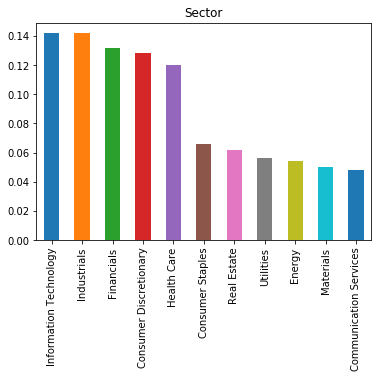

In [58]:
#Using the garph function to better understand the data by breaking the stocks on the S&P 500 index by industrial sector
def graphS():
    ps = df.Sector.value_counts()
    (ps/df.shape[0]).plot(kind = "bar");
    plt.title("Sector")
    """This function 'graphS()' will graph the stocks in the S%P 500 by sector"""
graphS()

In [59]:
#Liting all of the variables/features and amount of cases/data for each variable/feature, looking to idetify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
Symbol                                             500 non-null object
Company_Name                                       500 non-null object
Security_Price                                     500 non-null float64
Volume__90_Day_Avg_                                500 non-null float64
Market_Capitalization                              500 non-null object
Dividend_Yield                                     418 non-null float64
Company_Headquarters_Location                      500 non-null object
Sector                                             500 non-null object
Industry                                           500 non-null object
Price_Performance__52_Weeks_                       500 non-null float64
Total_Return__1_Yr_Annualized_                     500 non-null float64
Beta__1_Year_Annualized_                           499 non-null float64
Standard_Deviation__1_Yr_Annualized_ 

## Methodology

### Data Preprocessing

In [60]:
#3 Feature Engineering - removing all features that do not have a numerical data type
df2 = df.drop(["Total_Return__1_Yr_Annualized_", "Symbol", "Company_Name", "Sector", "Industry", "Company_Headquarters_Location", "Market_Capitalization", "P/E__Price/TTM_Earnings_"], axis=1)


In [61]:
#Feature engineering - listing remaining features 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Security_Price                                     500 non-null float64
Volume__90_Day_Avg_                                500 non-null float64
Dividend_Yield                                     418 non-null float64
Price_Performance__52_Weeks_                       500 non-null float64
Beta__1_Year_Annualized_                           499 non-null float64
Standard_Deviation__1_Yr_Annualized_               500 non-null float64
S&P_Global_Market_Intelligence_Valuation           498 non-null float64
S&P_Global_Market_Intelligence_Quality             498 non-null float64
S&P_Global_Market_Intelligence_Growth_Stability    498 non-null float64
S&P_Global_Market_Intelligence_Financial_Health    497 non-null float64
PEG_Ratio                                          406 non-null float64
EPS_Growth__Proj_This_Yr_vs._Last_Yr_              486 non-null float64
Institutional_Ownership        

In [62]:
#DividendYield has the most amount of NAN values, hence Filling all NaN values in column with 0 
df2.Dividend_Yield = df2.Dividend_Yield.fillna(0)

In [64]:
#Creating new dataframe to drop all NaN values from dataframe
  
final_df = df2.dropna()

In [65]:
#Dropping price perforamnce from data frame because it will be used as the target (Dependent) variable 
dfdata = final_df.drop(["Price_Performance__52_Weeks_"], axis=1)

In [66]:
#Ensuring thet ther drop worked
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 499
Data columns (total 13 columns):
Security_Price                                     389 non-null float64
Volume__90_Day_Avg_                                389 non-null float64
Dividend_Yield                                     389 non-null float64
Beta__1_Year_Annualized_                           389 non-null float64
Standard_Deviation__1_Yr_Annualized_               389 non-null float64
S&P_Global_Market_Intelligence_Valuation           389 non-null float64
S&P_Global_Market_Intelligence_Quality             389 non-null float64
S&P_Global_Market_Intelligence_Growth_Stability    389 non-null float64
S&P_Global_Market_Intelligence_Financial_Health    389 non-null float64
PEG_Ratio                                          389 non-null float64
EPS_Growth__Proj_This_Yr_vs._Last_Yr_              389 non-null float64
Institutional_Ownership                            389 non-null float64
Institutional_Ownership__Last_v

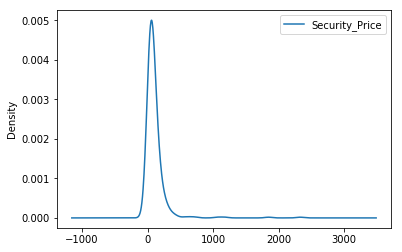

In [67]:
#Analzying feature to see if the data have a normal distribution

cols = final_df.columns[:1]
densityplot = final_df[cols].plot(kind='density')

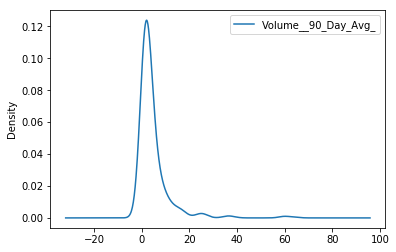

In [68]:
cols = final_df.columns[1:2]
densityplot = final_df[cols].plot(kind='density')

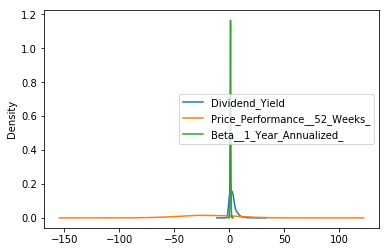

In [69]:
cols = final_df.columns[2:5]
densityplot = final_df[cols].plot(kind='density')

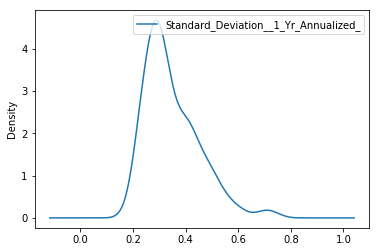

In [70]:
cols = final_df.columns[5:6]
densityplot = final_df[cols].plot(kind='density')

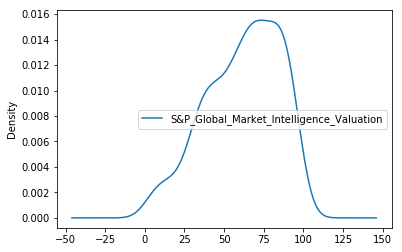

In [71]:
cols = final_df.columns[6:7]
densityplot = final_df[cols].plot(kind='density')

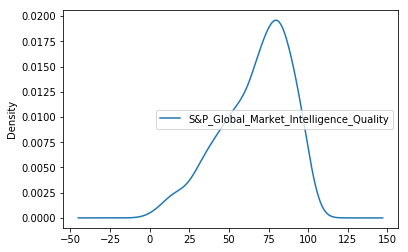

In [72]:
cols = final_df.columns[7:8]
densityplot = final_df[cols].plot(kind='density')

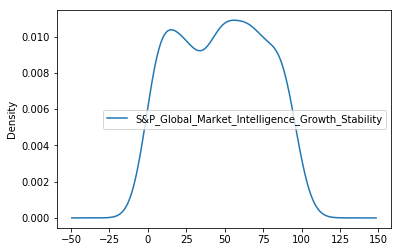

In [73]:
cols = final_df.columns[8:9]
densityplot = final_df[cols].plot(kind='density')

In [75]:
#Normalizing data
normalized_df = (final_df-final_df.min())/(final_df.max()-final_df.min())

In [76]:
data = normalized_df.drop(["Price_Performance__52_Weeks_"], axis=1)
target = normalized_df.Price_Performance__52_Weeks_

### Implementation

In [32]:
#Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                        test_size=0.3, 
                                        random_state=0)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_tr = scaling.transform(X_train)
X_t  = scaling.transform(X_test)

In [33]:
#Implementing the model 
svr = SVR()
search_space = [{'kernel': ['linear'], 
                 'C': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]},
                {'kernel': ['rbf'], 
                 'degree':[2,3], 
                 'C':np.logspace(-3, 3, 7), 
                 'gamma': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]}]
gridsearch = GridSearchCV(svr, 
                          param_grid=search_space, 
                          refit=True, 
                          scoring= 'r2',
                          cv=10, n_jobs=-1)
gridsearch.fit(X_tr, y_train)
cv = gridsearch.best_score_
test_score = gridsearch.score(X_tr, y_train)
print('CV R2 score: %0.3f' % cv)
print('Test R2 score: %0.3f' % test_score)
print('Best parameters: %s' % gridsearch.best_params_)

CV R2 score: 0.602
Test R2 score: 0.739
Best parameters: {'C': 1.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [94]:
# Creating a predictive model
model = SVR()
X = data
y = target 
#fitting the model 
model.fit(X, y)
#Making prediction model
pred_y = model.predict(X)
# Show prediction 
pred_y

array([ 0.52226078,  0.43898808,  0.64301125,  0.53778091,  0.61365017,
        0.53632371,  0.58458756,  0.67023629,  0.44468027,  0.4907083 ,
        0.11126238,  0.65411163,  0.61113479,  0.54236553,  0.37436014,
        0.42912213,  0.26899017,  0.58730756,  0.56851061,  0.34128715,
        0.38939472,  0.25439322,  0.50278004,  0.50565814,  0.46189499,
        0.62463123,  0.51850563,  0.52056775,  0.63357558,  0.75665689,
        0.5030665 ,  0.60279582,  0.46918129,  0.53863594,  0.47565832,
        0.56315155,  0.54256528,  0.52535269,  0.25843665,  0.4550071 ,
        0.60414291,  0.51032216,  0.58381154,  0.5893574 ,  0.42938514,
        0.5624902 ,  0.24249466,  0.41791361,  0.47665565,  0.47394785,
        0.63923391,  0.56676194,  0.51151511,  0.31632323,  0.35300566,
        0.40879139,  0.44226008,  0.52953819,  0.55184472,  0.57052227,
        0.38976666,  0.59582034,  0.5067408 ,  0.60799021,  0.52450333,
        0.44976444,  0.50668505,  0.61210055,  0.63387282,  0.56

### Refinement

In [240]:
# Looking for mulicollinarity or lack to better feautures and improve the model 

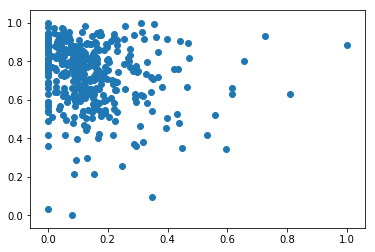

In [95]:
plt.scatter(data.Dividend_Yield, data.Institutional_Ownership)

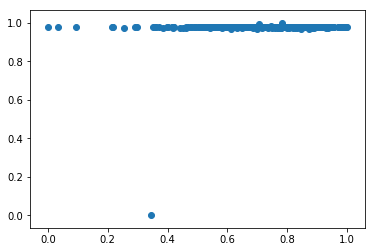

In [96]:
import matplotlib.pyplot as plt
plt.scatter(data.Institutional_Ownership, data.PEG_Ratio)

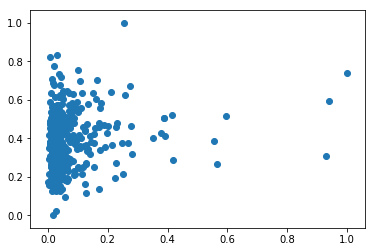

In [98]:
import matplotlib.pyplot as plt
plt.scatter(data.Volume__90_Day_Avg_, data.Beta__1_Year_Annualized_)

In [42]:
# Refining the data frame by removing two features that are suspected to be negatively impacting the model 
refdata = data.drop(["PEG_Ratio", "Security_Price"], axis = 1)

In [248]:
#Rerunning the model on new data frame to refine 

In [43]:

X_train, X_test, y_train, y_test = train_test_split(refdata, target, 
                                        test_size=0.3, 
                                        random_state=0)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_tr = scaling.transform(X_train)
X_t  = scaling.transform(X_test)

In [92]:
svr = SVR()
search_space = [{'kernel': ['linear'], 
                 'C': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]},
                {'kernel': ['rbf'], 
                 'degree':[2,3], 
                 'C':np.logspace(-3, 3, 7), 
                 'gamma': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]}]
gridsearch = GridSearchCV(svr, 
                          param_grid=search_space, 
                          refit=True, 
                          scoring= 'r2',
                          cv=10, n_jobs=-1)
gridsearch.fit(X_tr, y_train)
cv = gridsearch.best_score_
test_score = gridsearch.score(X_tr, y_train)
print('CV R2 score: %0.3f' % cv)
print('Test R2 score: %0.3f' % test_score)
print('Best parameters: %s' % gridsearch.best_params_)

CV R2 score: 0.601
Test R2 score: 0.735
Best parameters: {'C': 1.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


## Results

### Model Evaluation & Validation
The R2 score is used to evaluate the robustness of the model SVR model. The kernel used for the model was rbf as recommended by scikit learn library based on the type of data set we used. In this case the score .735, which means the model is accurate 73.5% of the time.

### Justification
We are not ecstatic about the results of 73.5% accuracy, ideally we wanted to reach 75%+, however we are satisfied with 73.5%. We were able to train the machine and run the test on the data that allows the machine to make a solid prediction that will be accurate 73.5% of the time. 

The SVR model was used because a linear regression would not suffice for a data set with more than 1 feature. A multiple regression may work but based of research findings SVR is a more flexible technique, helping to deal with the limitations pertaining to distributional properties of underlying variables, geometry of the data and the common problem of model overfitting. "We observe that SVR is superior to SLR as a prediction method. SLR cannot capture the nonlinearity in a dataset and SVR becomes handy in such situations" https://rpubs.com/linkonabe/SLSvsSVR

We also utilize the chart below from Scikit learns website to pick the right Ml-model:
![Pick.algo2](Pick.algo2.jpg)

Based on the chart we first determined we have more than 50 samples and our focus was predicting a quantity and not a category, therefore we eliminated all of the classification model and picked a regression model. Since we do not have more than 100K samples there was no need to do SDG Regressor. Also, having few features was not important so we did not pick Lasso, or Elastic Net. The best two choices were SVR and RidgeRegesion, hence we picked SVR as it was the most suitable model for our problem.

## Conclusion
### Reflection
We started by attempting to find ways to solve the problem. I learned a lot about picking the right algorithm and learned about the many options that exist. The most challenging parts of this project were two-fold. 1. Finding the data, we first attempted to build an ETL pipeline by using a yahoo web scrapping API but that was unsuccessful. I learned that extracting the data and building ETL pipelines is the hardest part of data science, which makes me interested in learning even more about data engineering. I also learned that there are a plethora of APIs from many sources, and some need a partnership with the provider to grant access to their data. I found that Google alone had hundresds and hundreds of APIs that will take a full semester course just to learn some of them. The second part was feature engineering to find the most relevant features that will make an accurate prediction.
### Improvement
This project can be improved/enhanced with an ETL pipeline that can pull data automatically through a refresh button from a financial website. It can also be improved by building an application that allows users to input a stock ticker and be able to get an output of a prediction of the 52-week price performance of that particular stock that they searched.
### Write-Up
Medium Blog Link:  https://link.medium.com/4viYqNyC44
